<a href="https://colab.research.google.com/github/Oubay007/Linear-regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

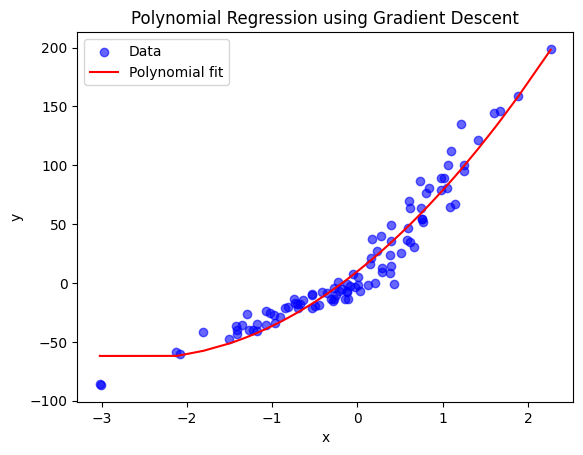

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1. Generate synthetic data
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)  # Make y positive

# 2. Prepare input matrix X for polynomial regression (x², x, bias)
X = np.hstack((x**2, x, np.ones((x.shape[0], 1))))  # shape (100, 3)
y = y.reshape(-1, 1)  # reshape y to (100, 1)

# 3. Define model prediction
def model(X, theta):
    return X @ theta  # matrix multiplication

# 4. Cost function (Mean Squared Error)
def cost(F, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((F - y) ** 2)

# 5. Gradient function
def grad(X, y, theta):
    m = len(y)
    return (1/m) * X.T @ (model(X, theta) - y)

# 6. Gradient descent function
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

# 7. Initialize weights theta
theta = np.random.randn(3, 1)

# 8. Train model
theta_final = gradient_descent(X, y, theta, 0.01, 1000)

# 9. Make predictions
predictions = model(X, theta_final)

# 10. Flatten x and predictions for plotting
x_flat = x.flatten()
pred_flat = predictions.flatten()

# 11. Sort x and predictions for smooth curve
sorted_idx = np.argsort(x_flat)

# 12. Plot data points and polynomial fit line
plt.scatter(x_flat, y, color='blue', alpha=0.6, label='Data')
plt.plot(x_flat[sorted_idx], pred_flat[sorted_idx], color='red', label='Polynomial fit')

plt.title('Polynomial Regression using Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
